In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cd "/content/drive/My Drive/Colab Notebooks" 

In [0]:
file_path = "/content/drive/My Drive/Colab Notebooks/faces94" 

In [0]:
import glob as glob
image_paths = glob.glob(file_path+'/*/*/*.jp*g')

In [0]:
len(image_paths)

3059

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,RMSprop
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Convolution2D, Dropout, Flatten, Dense, BatchNormalization, Reshape, UpSampling2D, Activation, AveragePooling2D, MaxPooling2D
from keras.optimizers import Adam, sgd
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import L1L2
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from skimage import transform
import sys


Using TensorFlow backend.


In [0]:

image_transform = (128, 128, 3)
images = np.empty((len(image_paths), *image_transform))
for i in range(len(image_paths)//3):
    img = plt.imread(image_paths[i])
    transformed_img = transform.resize(img, image_transform[0:2], preserve_range=True)
    images[i] = transformed_img
#images /= 255.0



/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
# def scale(X, x_min, x_max):
#     nom = (X-X.min(axis=0))*(x_max-x_min)
#     denom = X.max(axis=0) - X.min(axis=0)
#     denom[denom==0] = 1
#     return x_min + nom/denom 
imagee = images/127.5 -1
images = scale(images,-1,1)

In [0]:
np.random.shuffle(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


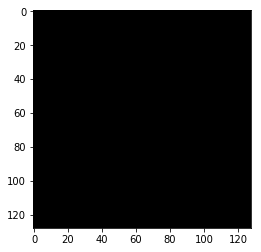

In [0]:

plt.imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


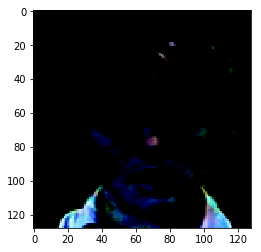

In [0]:
plt.imshow(images[89])

In [0]:
# X_train = images
# image_shape= (128,128,3)
# shuffled_images = np.empty((900, *image_shape))
# for i in range(900):
#     shuffled_images[i] = plt.imread(images_paths[i])
# plt.imshow(shuffled_images[20].astype(np.uint8))

In [0]:
class GAN:
  def __init__(self):
    self.img_rows = 128
    self.img_cols = 128
    self.channels= 3
    self.AM = None
    self.Disc_Model = None
    self.G = None
    self.D = None
    self.img_shape = (self.img_rows,self.img_cols,self.channels)
    self.latent_vector_size = 100
    
  def combined(self,generator,discriminator):
    z = Input(shape= (100,))
    optimizer = Adam(0.0002,0.5)
    self.generator = self.build_generator()
    generated_img = self.generator(z)
    self.discriminator = self.build_discriminator()
    self.discriminator.compile(loss= "binary_crossentropy",optimizer = optimizer,metrics = ['accuracy'])
    self.discriminator.trainable = False
    valid = self.discriminator(generated_img)
    return Model(z,valid)
  
  def build_generator(self):
#     if self.G:
#       return self.G
    self.G = Sequential()

    self.G.add(Dense(128*4*4, activation="linear", input_dim=self.latent_vector_size))
    self.G.add(Reshape((4, 4, 128)))   
    self.G.add(UpSampling2D())
    self.G.add(Conv2D(64, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(BatchNormalization(momentum=0.8))
    self.G.add(Activation("relu"))
    
    
    self.G.add(UpSampling2D())
    self.G.add(Conv2D(64, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(BatchNormalization(momentum=0.8))
    self.G.add(Activation("relu"))
    
    self.G.add(UpSampling2D())
    self.G.add(Conv2D(32, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(BatchNormalization(momentum=0.8))
    self.G.add(Activation("relu"))
    
    
    self.G.add(UpSampling2D())
    self.G.add(Conv2D(16, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(BatchNormalization(momentum=0.8))
    self.G.add(Activation("relu"))
     
    self.G.add(UpSampling2D())
    self.G.add(Conv2D(8, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(BatchNormalization(momentum=0.8))
    self.G.add(Activation("relu"))
    
    self.G.add(Conv2D(self.channels, nb_row=3, nb_col=3, border_mode="same"))
    self.G.add(Activation("sigmoid"))

    self.G.summary()
    z = Input(shape= (100,))
    generated_img = self.G(z)
    
    return Model(z,generated_img)

  def build_discriminator(self):
#     if self.D:
#       return self.D
    self.D = Sequential()

    self.D.add(Conv2D(64, nb_row=3, nb_col=3, subsample=(2,2), input_shape=self.img_shape, border_mode="same"))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.25))
    self.D.add(Conv2D(128, nb_row=3, nb_col=3, subsample=(2,2), border_mode="same"))
    #model.add(Zeroborder_mode2D(border_mode=((0,1),(0,1))))
    self.D.add(BatchNormalization(momentum=0.8))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.25))
    self.D.add(Conv2D(256, nb_row=3, nb_col=3, subsample=(2,2), border_mode="same"))
    self.D.add(BatchNormalization(momentum=0.8))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.25))
    self.D.add(Conv2D(512, nb_row=3, nb_col=3, subsample=(1,1), border_mode="same"))
    self.D.add(BatchNormalization(momentum=0.8))
    self.D.add(LeakyReLU(alpha=0.2))
    self.D.add(Dropout(0.25))
    self.D.add(Flatten())
    self.D.add(Dense(1, activation='sigmoid'))
    input_image = Input(shape=(128,128,3))
    validity= self.D(input_image)
    self.D.summary()
    return Model(input_image,validity)
class DCGAN:
  def __init__(self):
        self.img_rows = 128
        self.img_cols = 128
        self.channel = 3

        self.x_train = images
        self.x_train = self.x_train.reshape(-1, self.img_rows, self.img_cols, 3).astype(np.float32)

        self.gan_ = GAN()
        self.discriminator_ = self.gan_.build_discriminator()
        optimizer = Adam(0.0002,0.5)
        self.discriminator_.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        self.generator_ = self.gan_.build_generator()
        self.comb = self.gan_.combined(self.generator_,self.discriminator_)
        self.latent_vector_size = 100
        self.comb.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
  def train(self, epochs, batch_size, save_interval,images):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))    
    for epoch in range(epochs):
        idx = np.random.randint(0, images.shape[0], batch_size)
        imgs = images[idx]
        noise = np.random.normal(0, 1, (batch_size, self.latent_vector_size))
        gen_imgs = self.generator_.predict(noise)
        #plt.imshow(gen_imgs)
        d_loss_real = self.discriminator_.train_on_batch(imgs, valid)
        d_loss_fake = self.discriminator_.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = self.comb.train_on_batch(noise, valid)
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f, G_acc: %.2f%%]" % (epoch, d_loss[0], d_loss[1], g_loss[0],g_loss[1]))
        if epoch % save_interval == 0:
            self.save_imgs(epoch)
  
  def save_imgs(self, epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, self.latent_vector_size))
    gen_imgs = self.generator_.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("/content/drive/My Drive/Colab Notebooks/images/DC_GAN_%d.png" % epoch)
    plt.close()


  

In [0]:
if __name__ == '__main__':
  dcgan = DCGAN()
  dcgan.train(1000, 256, 50,images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(128, 128,..., strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), strides=(2, 2), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), strides=(1, 1), padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2048)              206848    
_________________________________________________________________
reshape_5 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
batch_normalization_36 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_25 (Activation)   (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_22 (UpSampling (None, 16, 16, 64)        0         
__________